In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

In [3]:
reeses = cv2.imread('../DATA/reeses_puffs.png',0)

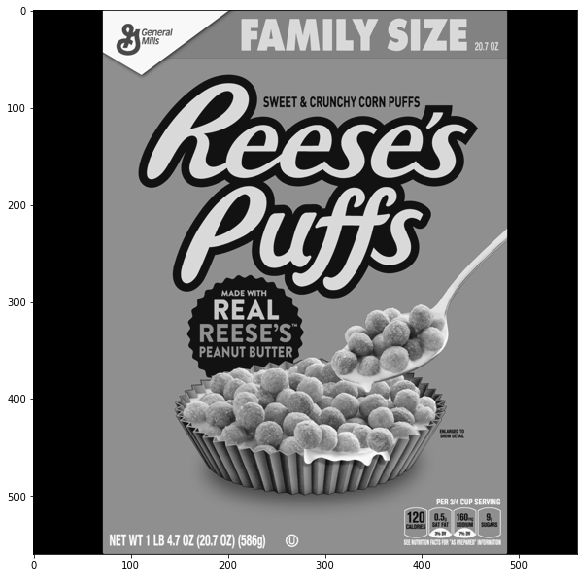

In [4]:
display(reeses)

In [5]:
cereals = cv2.imread('../DATA/many_cereals.jpg',0)

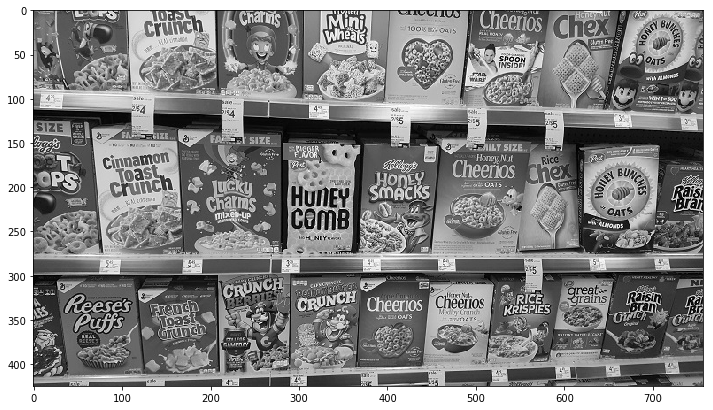

In [6]:
display(cereals)

In [7]:
orb = cv2.ORB_create()

In [8]:
kp1, des1 = orb.detectAndCompute(reeses,None)
kp2, des2 = orb.detectAndCompute(cereals,None)

In [9]:
bf = cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

In [10]:
matches = bf.match(des1,des2)

In [11]:
single_match = matches[0]

In [12]:
single_match.distance

56.0

In [13]:
len(matches)

139

In [14]:
matches = sorted(matches,key=lambda x:x.distance)

In [15]:
reeses_matches = cv2.drawMatches(reeses,kp1,cereals,kp2,matches[:25],None,flags=2)

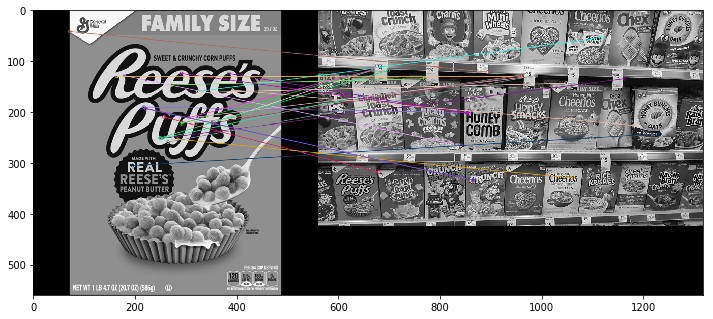

In [16]:
display(reeses_matches)

# Part2
---

In [17]:
sift = cv2.SIFT_create()

In [18]:
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

In [19]:
bf = cv2.BFMatcher()

In [20]:
des1

array([[19.,  0.,  0., ...,  1.,  0.,  0.],
       [15.,  0.,  0., ..., 11.,  1.,  0.],
       [21.,  0.,  0., ...,  0., 10., 13.],
       ...,
       [61.,  6.,  0., ...,  0.,  0.,  0.],
       [27.,  0.,  0., ...,  0.,  0.,  0.],
       [48.,  0.,  0., ...,  0.,  1.,  0.]], dtype=float32)

In [21]:
matches = bf.knnMatch(des1,des2,k=2)

In [22]:
good = []

for match1,match2 in matches:
    
    if match1.distance < 0.75*match2.distance:
        good.append([match1])

In [23]:
len(good)

79

In [24]:
len(matches)

1501

In [25]:
sift_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)

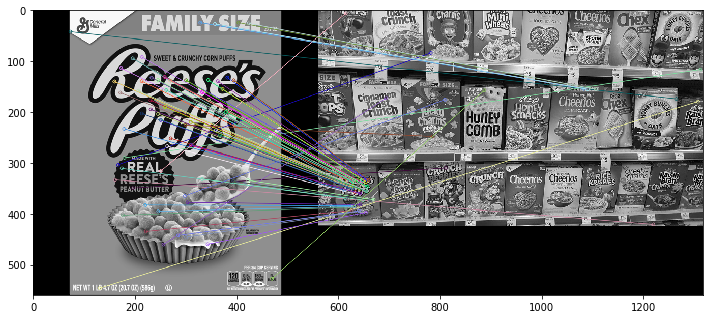

In [26]:
display(sift_matches)

In [27]:
# next level
sift = cv2.SIFT_create()

In [28]:
kp1, des1 = sift.detectAndCompute(reeses,None)
kp2, des2 = sift.detectAndCompute(cereals,None)

In [29]:
# FLANN
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm=FLANN_INDEX_KDTREE,tree=5)
search_params = dict(checks=50)

In [30]:
flann = cv2.FlannBasedMatcher(index_params,search_params)

In [31]:
matches = flann.knnMatch(des1,des2,k=2)

In [32]:
matchesMask = [[0,0] for i in range(len(matches))]

In [33]:
# good = []

for i,(match1,match2) in enumerate(matches):
    
    if match1.distance < 0.7*match2.distance:
        matchesMask[i] = [1,0]
        #good.append([match1])

In [34]:
draw_params = dict(matchColor=(0,255,0),
                  singlePointColor=(255,0,0),
                  matchesMask=matchesMask,
                  flags=0)

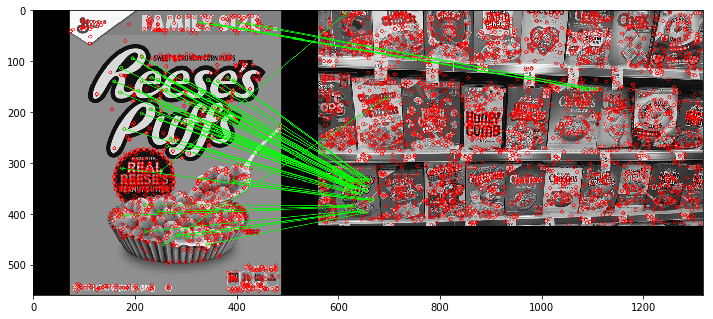

In [35]:
# flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,good,None,flags=2)
flann_matches = cv2.drawMatchesKnn(reeses,kp1,cereals,kp2,matches,None,**draw_params)

display(flann_matches)